# Which USS should I visit?

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

In [210]:
df = pd.read_csv('universal_studio_branches.csv')

# First look at dataset

In [24]:
df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [650]:
df.shape

(50904, 8)

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
 6   written_year  50904 non-null  object 
 7   lol           50904 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [155]:
df.describe()

,rating
count,50904.000000
mean,4.256994
std,1.046716
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
df.columns

Index(['reviewer', 'rating', 'written_date', 'title', 'review_text', 'branch'], dtype='object')

# Basic Data cleaning

In [636]:
df.loc[(df["rating"]>5) | (df["rating"]<1)]

,reviewer,rating,written_date,title,review_text,branch,written_year,lol


There are no errant rows with ratings > 5 or < 1

In [645]:
df.loc[(df["reviewer"]) == ""]

,reviewer,rating,written_date,title,review_text,branch,written_year,lol


All inputs have a valid reviewer 

Dataset is relatively clean, there is no need to delete any errant rows / columns.

# Splitting the dataset

In [23]:
branches = []
for rows in df.branch:
    if rows not in branches:
        branches.append(rows)
    else:
        continue
print(branches)

['Universal Studios Florida', 'Universal Studios Japan', 'Universal Studios Singapore']


In [154]:
sg_df = df.loc[df['branch'] == "Universal Studios Singapore"]
jap_df = df.loc[df['branch'] == "Universal Studios Japan"]
florida_df = df.loc[df['branch'] == "Universal Studios Florida"]

Created new dataframes for each branch 

# Visualising the ratings

In [153]:
df.groupby('branch').mean()

,rating
branch,
Universal Studios Florida,4.266418
Universal Studios Japan,4.131376
Universal Studios Singapore,4.274787


To get a rough estimation, we can calculate the means of each branch. From this, we can derive that the Japan branch may seem to have poorer reviews.

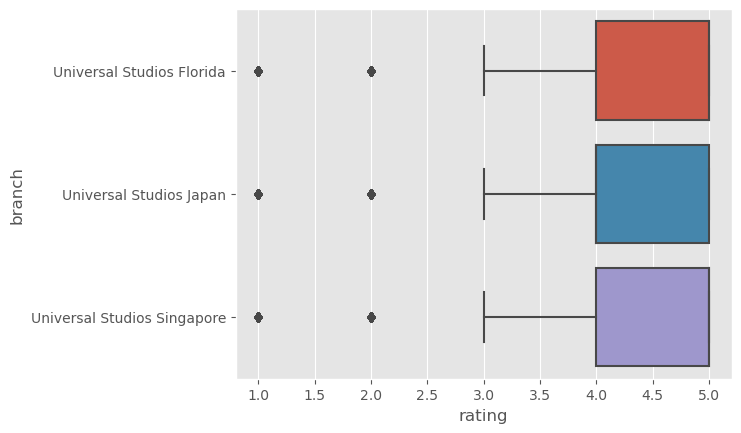

In [151]:
sns.boxplot(y = df['branch'], x = df['rating'])
plt.show()

Upon a boxplot, we obsere that there is not much variation as the ratings are mainly given in whole numbers. Hence, I decided to plot a pie chart to get a better understanding of the distribution of ratings amongst the different branches.


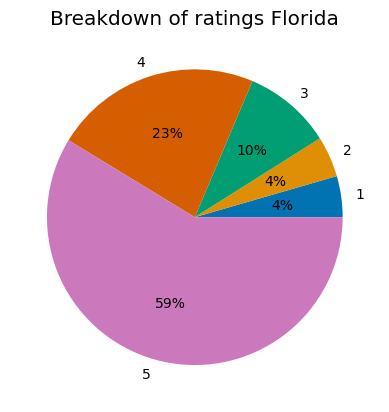

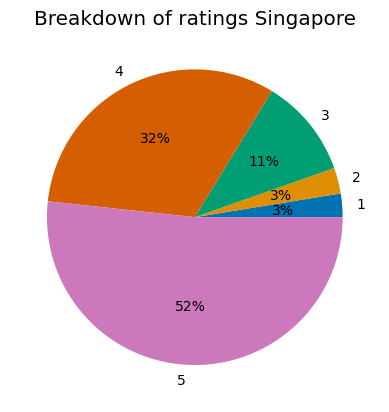

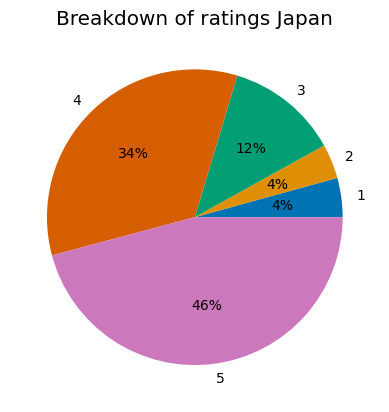

In [152]:
ratings_grouped = florida_df.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,2,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Florida")
plt.show()

ratings_grouped = sg_df.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,2,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Singapore")
plt.show()

ratings_grouped = jap_df.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,2,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Japan")
plt.show()

From this 3 pie charts, we can observe a stark drop in the number of 5 star reviews (purple) amongst the branches. Florida leads with 59% while Japan is the lowest, with only 46% 5 star reviews.

This supports our initial table which showed that the mean of the reviews in Japan branch were the lowest. Therefore, we can conclude that the Japan branch has been receiving poorer reviews than the other branches.

# Taking time into account

In [175]:
dates = []
for rows in df.written_date:
    if rows[-4:] not in dates:
        dates.append(rows[-4:])
    else:
        continue
print(dates)

['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002']


In [506]:
df['written_year'] = df['written_date'].str.slice(-4)
df.pivot_table(index = "written_year", columns = "branch", values = "rating", aggfunc = "mean")

branch,Universal Studios Florida,Universal Studios Japan,Universal Studios Singapore
written_year,,,
2002,1.000000,NaN,NaN
2003,4.571429,NaN,NaN
2004,3.771930,NaN,NaN
2005,3.600000,NaN,NaN
2006,3.483333,NaN,NaN
2007,3.628205,4.500000,NaN
2008,3.500000,2.000000,NaN
2009,3.696429,4.000000,NaN
2010,3.636076,4.428571,3.406593


A quick check on the year of the reviews will reveal that these reviews were collected from 2002 to 2021. That is a very long time! This introduces another dimension to our data analysis. In this next part, I will try to analyse the changes of the branches across time, and come up with a more accurate and updated picture of each branch.

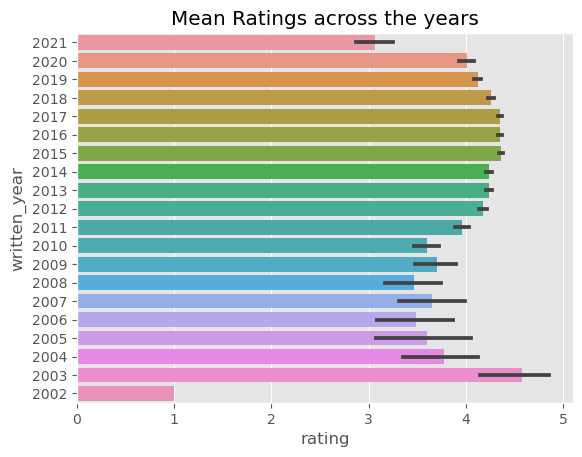

In [227]:
df['written_year'] = df['written_date'].str.slice(-4)
sns.barplot(data = df, y = 'written_year' , x = "rating")
plt.title("Mean Ratings across the years")
plt.show()

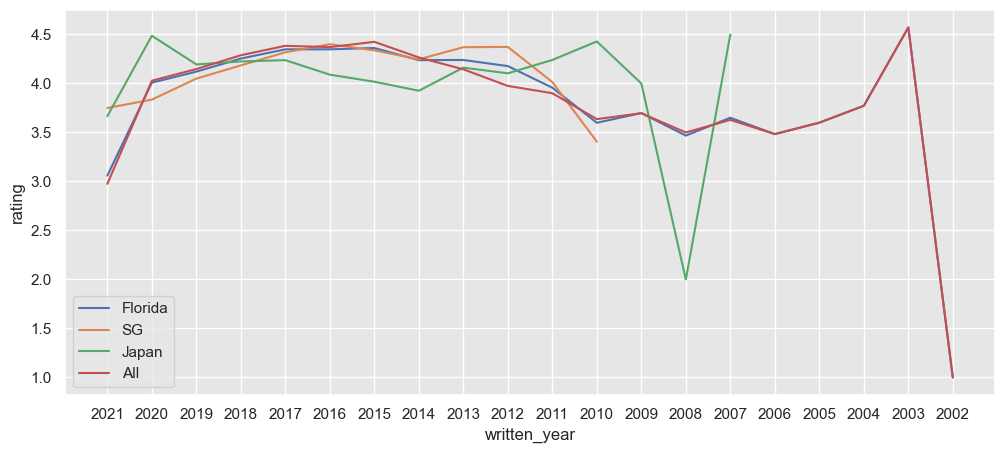

In [301]:
df['written_year'] = df['written_date'].str.slice(-4)
fig = plt.subplots(figsize=(12, 5))
sns.set_theme(style='white', font_scale=1)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=df, x = 'written_year', y = "rating", ci = None)
sns.lineplot(data=sg_df, x = 'written_year', y = "rating", ci = None)
sns.lineplot(data=jap_df, x = 'written_year', y = "rating", ci = None)
sns.lineplot(data=florida_df, x = 'written_year', y = "rating", ci = None)
plt.legend(["Florida", "SG", "Japan", "All"])
plt.show()

As we can observe the line graph fromn 2021 to 2002, the ratings sharply dropped from 2003 to 2006, before steadily increasing till about 2017. After 2017, the ratings steadily decreased and and sharply dropped from 2020 to 2021. All the branches followed the same pattern, except for Japan, which experienced a steep drop from 2007 to 2008, before recovering back to 2009 where it followed the general trend. 

This line graph illustrates to us the great variation in ratings over the years. From time periods 2004 to 2010, mean ratings were around 3.6 to 3.8 range while ratings rose to about 4.4 during 2015 - 2017 period. Hence, it is inconclusive to use the overall mean ratings to form conclusions about any of the branches of Universal Studios. If we want a more accurate potrayal of ratings, we should refer to more recent reviews, such as the ones in year 2020 and 2021. 

In [360]:
df2021 = df.loc[(df["written_year"] == "2021") | (df["written_year"] == "2020") ]
df2021.groupby('branch').mean()

,rating
branch,
Universal Studios Florida,3.728700
Universal Studios Japan,4.455696
Universal Studios Singapore,3.827476


In [474]:
sg2021 = sg_df.loc[(sg_df["written_year"] == "2021") | (sg_df["written_year"] == "2020") ]
jap2021 = jap_df.loc[(jap_df["written_year"] == "2021") | (jap_df["written_year"] == "2020")]
florida2021 = florida_df.loc[(florida_df["written_year"] == "2021") | (florida_df["written_year"] == "2020")]

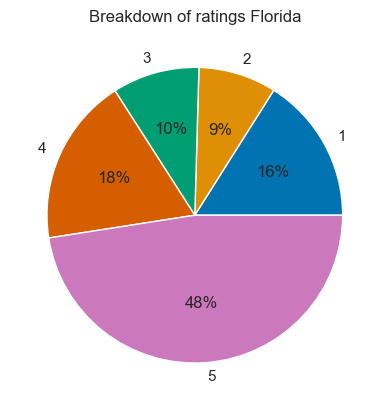

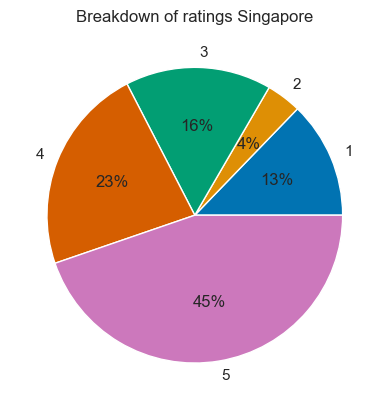

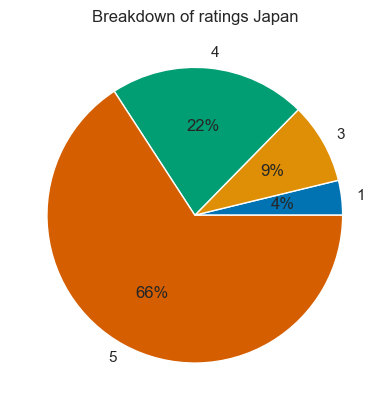

In [334]:
ratings_grouped = florida2021.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,2,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Florida")
plt.show()

ratings_grouped = sg2021.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,2,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Singapore")
plt.show()

ratings_grouped = jap2021.groupby('rating')['rating'].count()
palette_color = sns.color_palette('colorblind')
plt.pie(ratings_grouped, labels = [1,3,4,5], colors=palette_color, autopct='%.0f%%')
plt.title("Breakdown of ratings Japan")
plt.show()


Realizing the additional dimensionality in our dataset, we realised that some older reviews should no longer be included as it may not be as relevant as before. In order to gain a quick and accurate outlook on how the different branches are perfoming now, we filtered the reviews to only give us data from the 2 recent years, 2020 and 2021. 

After filtering the data, we realised that Japan actually outperformed the other branches by quite a margin, with an average rating of 4.5 compared to 3.8 and 3.7 of Singapore and Florida respectively. By drawing the pie charts, we can also see that the Japan branch received a majority of 66% 5 star ratings, as compared to 45% and 48% of Singapore and Florida. This further supports our conclusion that Japan is outperforming the other branches in recent times

# Visualizing the written reviews with Natural Language Processing

In [368]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [369]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [549]:
def roberta_polarity(text):
    encoded_text = tokenizer(text, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {"negative":scores[0],
           "neutral":scores[1],
           "positive":scores[2]}

def get_pos(text):
    try:
        return roberta_polarity(text)["positive"]
    except RuntimeError:
        return 0.0

def get_neut(dicter):
    try:
        return roberta_polarity(text)["neutral"]
    except RuntimeError:
        return 0.0

def get_neg(text):
    try:
        return roberta_polarity(text)["negative"]
    except RuntimeError:
        return 0.0

As mentioned above, we need to filter the data to more recent times. In this case, we will take data from 2020 to 2021 and use the pre trained roberta model to conduct NLP on the written reviews. We chose roberta over conventional methods like NLTK. This is because roberta is a model that takes into context of words in a sentence. This increases the accuracy of the NLP analysis, as compared to just analyzing each word individually.

In [606]:
df2021 = df.loc[(df["written_year"] == "2021") | (df["written_year"] == "2020") ]

In [618]:
df2021["review_pos"] = df2021.apply(lambda row: get_pos(row[4]),axis = 1) 
df2021["review_neu"] = df2021.apply(lambda row: get_neut(row[4]),axis = 1) 
df2021["review_neg"] = df2021.apply(lambda row: get_neg(row[4]),axis = 1)

In [ ]:
pos2021 = df2021.groupby('branch')['review_pos'].mean().to_frame()
neu2021 = df2021.groupby('branch')['review_neu'].mean().to_frame()
neg2021 = df2021.groupby('branch')['review_neg'].mean().to_frame()
frames = [pos2021, neu2021, neg2021]
table2021 = pd.concat(frames, axis = 'columns')

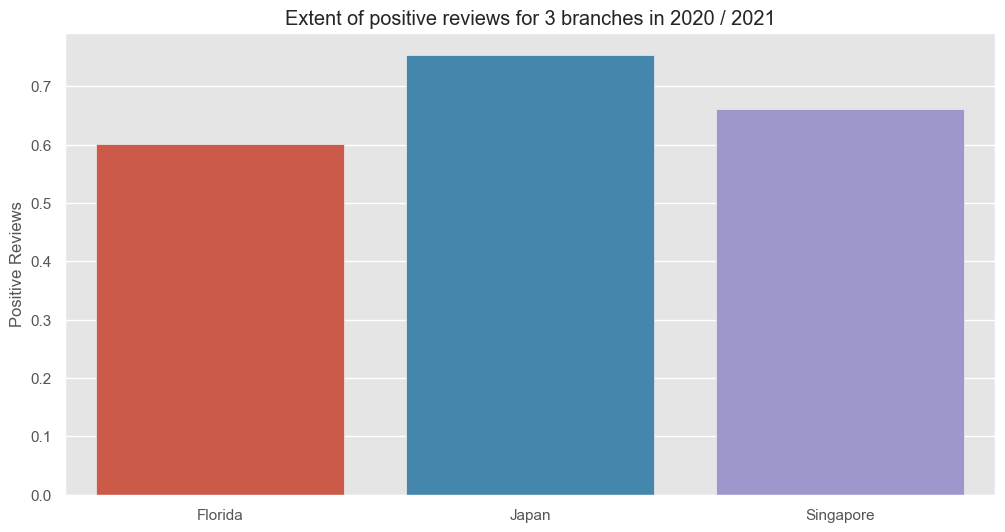

In [569]:
fig = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data = table2021, y = 'review_pos' , x = ["Florida", "Japan", "Singapore"])
ax.set(ylabel = "Positive Reviews")
plt.title("Extent of positive reviews for 3 branches in 2020 / 2021")
plt.show()

Using the roberta model, we are able to get an average score of 'positivity' of the written reviews. We then found the mean 'positivity' for this branches. As supported by the numerical ratings, Japan is the best performing branch in recent years with a score of about 0.75, while Singapore and Florida are behind with a score of about 0.65 and 0.60 respectively.


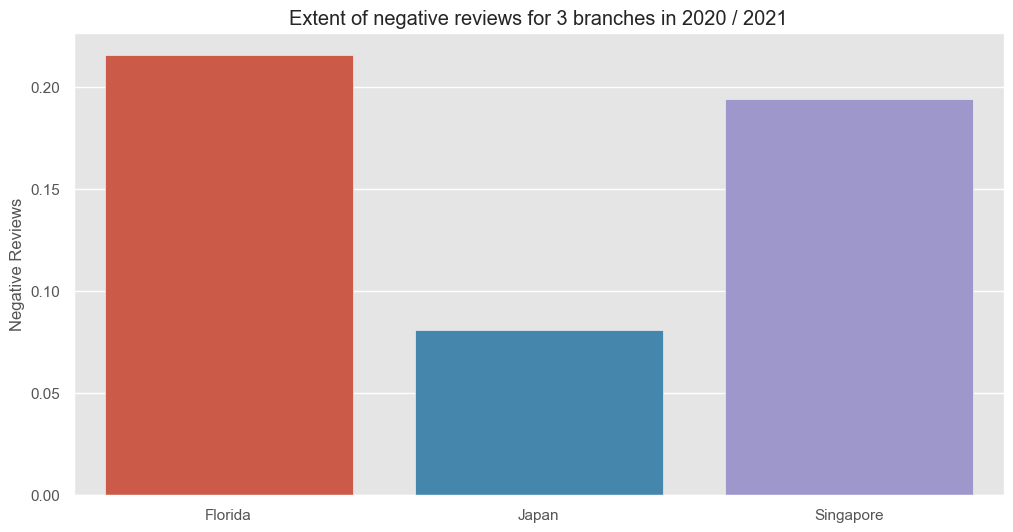

In [570]:
fig = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data = table2021, y = 'review_neg' , x = ["Florida", "Japan", "Singapore"])
ax.set(ylabel = "Negative Reviews")
plt.title("Extent of negative reviews for 3 branches in 2020 / 2021")
plt.show()

This bar graph shows the extent of 'negativity' instead. From this graph, we can gather that there is very little 'negative' sentiment from the written reviews with the Japan branch. The Florida and Singapore branches have doubled the 'negativity' score of the Japan branch. This means that visitors are generally much unsatisfied / unhappier with their visits to the other 2 branches

From the preliminary data exploration, we realise that Japan was the weakest performing branch that lagged behind Singapore and Florida. However, as the data was collected over a long period of time, some of it may not be as relevant today. Hence, we factored time into consideration and repeated the analysis.

After factoring in time, it is surprising but the data supports that Japan is actually outperfoming the other 2 branches quite substantially. It is difficult to conclude whether Japan has exceptional service, or whether Singapore / Florida has lackadasical amenities. However, we can confidently conclude that Japan is the best performing branch, based on the reviews given in this dataset.

Therefore, if you are looking for the best experience at Universal Studios, the safest choice would be Japan. 

However, a question still remains unanswered - when is the best time to visit? As with the rest of the world, Japan experiences 4 main seasons, Spring, Summer, Autumn and Winter. In the analysis below, we will try to figure out the best time to visit Japan USS.

# Finding best season to visit

In order to find the best season to visit, we decided to take into account the earlier reviews as well. As seasons generally do not change over the years (it always snows in winter and it is always hot in summer), we decided that time is a non-factor in this aspect.

In [571]:
jap_df = df.loc[df['branch'] == "Universal Studios Japan"]

In [575]:
spring = ["April", "May"]
summer = ["June", "July", "August"]
autumn = ["September", "October", "November"]
winter = ["December", "January", "February", "March"]

In [587]:
japSpring = df.loc[(df["written_date"].str.contains("|".join(spring)))]
japSummer = df.loc[(df["written_date"].str.contains("|".join(summer)))]
japAutumn = df.loc[(df["written_date"].str.contains("|".join(autumn)))]
japWinter = df.loc[(df["written_date"].str.contains("|".join(winter)))]

In [609]:
data = [japSpring.rating.mean(), japSummer.rating.mean(), japAutumn.rating.mean(), japWinter.rating.mean()]
rows = ["Spring", "Summer", "Autumn", "Winter"]
japMeans = pd.DataFrame(data, index = rows, columns = ["Mean"])

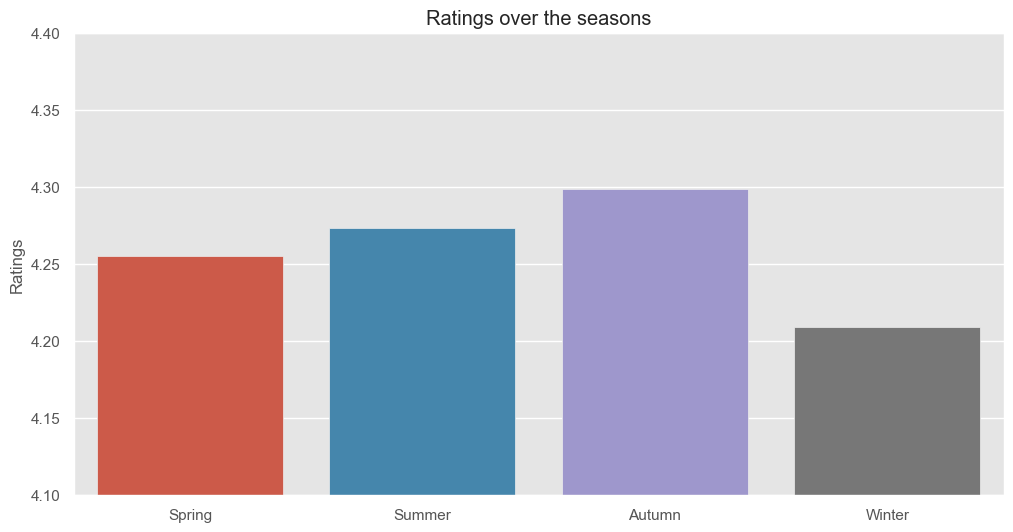

In [617]:
fig = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data = japMeans, y = 'Mean' , x = japMeans.index)
ax.set(ylabel = "Ratings")
ax.set_ylim(4.1,4.4)
plt.title("Ratings over the seasons")
plt.show()

From this chart, we observe a pattern as the ratings gradually increases from Spring to Autumn from 4.25 to 4.30 before drastically dropping to 4.22 in Winter. However, quantitavely speaking, the difference is only about 0.04. Hence, it is reasonable to conclude that there is only a minute and slight disadvantage to visiting Universal Studios Japan in Winter. 

# Conclusion

As from our data visualisations and analysis, it is evident that the Japan branch is the rated the best amongst the 3 branches. Also, there is a slight advantage in visiting the Japan branch during Autumn as it produces the highest mean rating amongst the seasons.

Therefore, our recommendation would be to visit Universal Studios Japan during Autumn for the best experience! :D